-2*x
1/(2*sqrt(u))


'dxdt:'

'Derivative of dx/dt with respect to x'

'Derivative of dx/dt with respect to u'

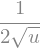

Approximate Partial Derivatives
-4.000000000004
0.12499999999970868
Exact Partial Derivatives
-4.0
0.125


In [1]:
# analytic solution with Python
from IPython.display import display, Markdown
import sympy as sp
sp.init_printing()
# define symbols
x,u = sp.symbols(['x','u'])

dxdt_symbol = sp.symbols('dx/dt')
# define equation
dxdt = -x**2 + sp.sqrt(u)

#display(dxdt_symbol)
jnk = sp.Eq(dxdt_symbol,dxdt)
display(jnk)

print(sp.diff(dxdt,x))
print(sp.diff(dxdt,u))

display('dxdt:')
display(dxdt)
display('Derivative of dx/dt with respect to x')
display(sp.diff(dxdt,x))
display('Derivative of dx/dt with respect to u')
display(sp.diff(dxdt,u))

# numeric solution with Python
import numpy as np
from scipy.misc import derivative
u = 16.0
x = 2.0
def pd_x(x):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt
def pd_u(u):
    dxdt = -x**2 + np.sqrt(u)
    return dxdt

print('Approximate Partial Derivatives')
print(derivative(pd_x,x,dx=1e-4))
print(derivative(pd_u,u,dx=1e-4))

print('Exact Partial Derivatives')
print(-2.0*x) # exact d(f(x,u))/dx
print(0.5 / np.sqrt(u)) # exact d(f(x,u))/du

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

%matplotlib widget

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 4, 0.25)
U = np.arange(0, 20, 0.25)
X, U = np.meshgrid(X, U)
DXDT = -X**2 + np.sqrt(U)
LIN = -4.0 * (X-2.0) + 1.0/8.0 * (U-16.0)

# Plot the surface.
surf = ax.plot_wireframe(X, U, LIN)
surf = ax.plot_surface(X, U, DXDT, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-10.0, 5.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add labels
plt.xlabel('x')
plt.ylabel('u')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x1 = z[0]
    x2 = z[1]
    dx1dt = -x1**2 + np.sqrt(u)
    dx2dt = -4.0*(x2-2.0) + (1.0/8.0)*(u-16.0)
    dzdt = [dx1dt,dx2dt]
    return dzdt

# steady state conditions
x_ss = 2.0
u_ss = 16.0

# initial condition
z0 = [x_ss,x_ss]

# final time
tf = 10

# number of time points
n = tf * 10 + 1

# time points
t = np.linspace(0,tf,n)

# step input
u = np.ones(n) * u_ss
# magnitude of step
m = 1.0
# change up m at time = 1.0
u[11:] = u[11:] + m
# change down 2*m at time = 4.0
u[41:] = u[41:] - 2.0 * m
# change up m at time = 7.0
u[71:] = u[71:] + m

# store solution
x1 = np.empty_like(t)
x2 = np.empty_like(t)
# record initial conditions
x1[0] = z0[0]
x2[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x1[i] = z[1][0]
    x2[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(t,u,'g-',linewidth=3,label='u(t) Doublet Test')
plt.grid()
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(t,x1,'b-',linewidth=3,label='x(t) Nonlinear')
plt.plot(t,x2,'r--',linewidth=3,label='x(t) Linear')
plt.xlabel('time')
plt.grid()
plt.legend(loc='best')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

-0.440504467457193


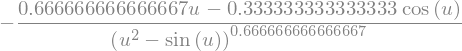

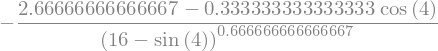

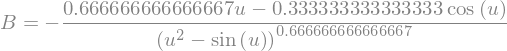

sympify:


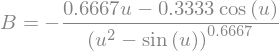

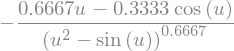

In [34]:
# analytic solution with Python
import sympy as sp
# define symbols
y,u,d,Beta = sp.symbols(['y','u','d','Beta'])
# define equation
dydt = 3*y**3-(u**2-sp.sin(u))**(1/3)+sp.log(d)
# partial derivative with respect to u
beta_equation = sp.Eq(Beta,sp.diff(dydt,u))
# evaluate at steady state condition
print(beta.subs(u,4).evalf())

display(beta)
display(beta.subs(u,4))

display(beta_equation)
display(beta_equation.subs(u,4).evalf(4))
print('sympify:')
display(sp.sympify(beta_equation.evalf(4)))
display(sp.sympify(beta_equation.evalf(4).lhs))
display(sp.sympify(beta_equation.evalf(4).rhs))
display(sp.sympify(beta_equation.subs(u,2.5).evalf(4).rhs))
display(float(sp.sympify(beta_equation.subs(u,2.5).evalf(4).rhs)) + 100.0)
display(float(beta_equation.subs(u,2.5).evalf(4).rhs) + 100.0)

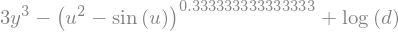

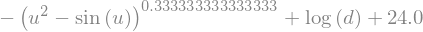

In [16]:
display(dydt)
display(dydt.subs(y,2).evalf())
display(dydt.subs(u,4).subs(d,2).evalf())
display(dydt.subs(y,2).subs(u,4).subs(d,2).evalf())

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define thermocouple model
def thermocouple(x,t,Tg,Tf):
    ## States
    Tt = x[0] 
    Tlin = x[1]

    ## Parameters
    h = 2800.0            # W/m^2-K
    rho = 20.0            # gm/cm^3
    sigma = 5.67e-8       # W/m^2-K^4
    eps = 0.8             #
    Cp = 0.4              # J/gm-K    
    d = 0.01              # cm
    r = d / 2.0           # radius
    A = 4.0 * np.pi * (r/100.0)**2 # sphere area (m^2)
    V = 4.0/3.0 * np.pi * r**3 # sphere volume (cm^3)

    # acc = inlet - outlet
    # acc = m * Cp * dT/dt = rho * V * Cp * dT/dt
    # inlet - outlet from 2 heat transfer pathways
    # q(convection) = h * A * (Tg-Tt)
    # q(radiation) = A * esp * sigma * (Tf^4 - Tt^4)
    q_conv = h * A * (Tg-Tt)
    q_rad = A * eps * sigma * (Tf**4 - Tt**4)
    dTdt = (q_conv + q_rad) / (rho * V * Cp)
    dTlin_dt = 0.0 # add linearized equation
    return [dTdt,dTlin_dt]

# Flame temperature
Tf0 = 1500.0 #K

# Starting thermocouple temperature
y0 = [Tf0,Tf0]

# Time Intervals (sec)
t = np.linspace(0,0.1,1000)

# Flame Temperature
Tf = np.ones(len(t))*Tf0
Tf[500:] = 1520.0 #K

# Gas temperature cycles
Tg = Tf + (150.0/2.0) * np.sin(2.0 * np.pi * 100.0 * t) #K

# Store thermocouple temperature for plotting
Tt = np.ones(len(t)) * Tf
Tlin = np.ones(len(t)) * Tf

for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    y = odeint(thermocouple,y0,ts,args=(Tg[i],Tf[i]))
    y0 = y[-1]
    Tt[i+1] = y0[0]
    Tlin[i+1] = y0[1]

# Plot the results
plt.figure()
plt.plot(t,Tg,'b--',linewidth=3,label='Gas Temperature')
plt.plot(t,Tf,'g:',linewidth=3,label='Flame Temperature')
plt.plot(t,Tt,'r-',linewidth=3,label='Thermocouple')
plt.ylabel('Temperature (K)')
plt.legend(loc='best')
plt.xlim([0,t[-1]])
plt.xlabel('Time (sec)')

plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …